In [1]:
import matplotlib.pyplot as plt
import random as random
import networkx as nx
import graphs
import models
from scipy.optimize import curve_fit
from tqdm import tqdm
import numpy as np

In [2]:
def Sim(G, nSIR, betas, g, I0):
    N = G.number_of_nodes() #Population size
    R = []
    for b in betas:
        model = models.SIR(G,N,b,g,I0)
        max_it = 20000 #Stop simulation at this iteration.
        aux_R = []
        for j in range(0,nSIR): 
            iterations = []
            for i in range(0, max_it): #Steps of the SIR
                it = model.iteration() #Iterates the model
                iterations.append(it) #Saves the iteration
                state = it['node_count'] 
                if state[1] == 0: #Checks it the number of Infected is zero
                    break
            it = iterations[len(iterations)-1] #Last iteration of the model
            state = it['node_count']
            aux_R.append(state[2]) #Appends number of recovered in the aux_R list
        R.append(sum(aux_R)/len(aux_R)) #Appends number of recovered mean value for each SIR simulation
    return R

In [44]:
betas = np.linspace(0,1,40) #Values of beta to be used in the SIR model.
g = 1 #Recovery rate
nG = 50 #Number of graphs to be generated to model the SIR.
I0 = 1 #Initial number of infected people.
nSIR = 100 #Number of times we want to simulate SIR 
#Use the parameters below to obtain same mean degree in all graphs
#G_klemm = graphs.klemm_eguiluz(3,10000)
#G_barabasi = graphs.barabasi_albert(10000,3)
#G_erdos = graphs.erdos_renyi(10000,0.00065)
#G_strogatz = graphs.watts_strogatz(10000,7,0.1)

In [32]:
Rs = []
for k in tqdm(range(0,nG)):
    G = graphs.barabasi_albert(10000,3)
    R = Sim(G, nSIR, betas, g, I0)
    Rs.append(R) #Saves the mean value of R for each SIR simulation
avg_R_barabasi = [sum([R[i] for R in Rs])/nG for i in range(0,len(betas))]


100%|██████████| 75/75 [24:18<00:00, 19.44s/it]


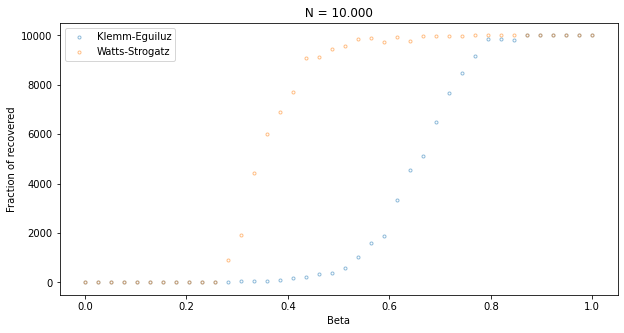

In [36]:
figure = plt.figure(figsize = (10,5))
plt.plot(betas, avg_R_klemm, '.', mfc ='none', label = 'Klemm-Eguiluz',alpha = 0.5)
plt.plot(betas, avg_R_erdos, '.', mfc ='none', label = 'Erdos-Renyi',alpha = 0.5)
plt.plot(betas, avg_R_strogatz, '.', mfc='none', label = 'Watts-Strogatz',alpha = 0.5)
plt.plot(betas, avg_R_barabasi, '.', mfc ='none', label = 'Barabasi',alpha = 0.5)
plt.legend(loc = 'best')
plt.ylabel('Fraction of recovered')
plt.xlabel('Beta')
plt.title(' N = 10.000 ')
plt.show()

In [49]:
Rs = []
beta = [0.7] #Fixed beta value
avg_R_klemm_b7 = []
Ns = [5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000]
for Nx in tqdm(Ns): 
    for k in range(0,nG):
        G = graphs.klemm_eguiluz(3,Nx) #Creates graph
        R = Sim(G, nSIR, beta, g, I0)
        Rs.append(R) #Saves the mean value of R for each SIR simulation
    avg_R_klemm_b7.append([sum([R[0] for R in Rs])/nG])

100%|██████████| 12/12 [37:45<00:00, 188.76s/it]


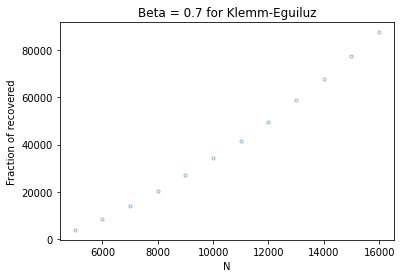

In [51]:
plt.plot(Ns, avg_R_klemm_b7,'.' ,mfc ='none', label = 'beta = 0.7',alpha = 0.5)
plt.title('Beta = 0.7 for Klemm-Eguiluz')
plt.ylabel('Fraction of recovered')
plt.xlabel('N')
plt.show()

In [53]:
with open('klemm_b7_RvsN.txt', 'w') as f:
    for item in avg_R_klemm_b7:
        f.write("%s\n" % item[0])